# Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split

# Load the dataset, check description and preprocessing


download the dataset from: https://github.com/selva86/datasets/blob/master/BostonHousing.csv

In [3]:
#store the dataset as a pandas dataframe
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#let's check descriptive statistics of the dataset e.g. mean, max, min, std etc. of each feature vector
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory data analysis


## Plot functions for Exploratory Data Analysis (EDA)


In [6]:
#plot function for pairgrid
def pairgrid(data, diag = sns.kdeplot, upper = sns.scatterplot, lower = sns.kdeplot, grid = "darkgrid"):
    """
    Plots pairwise relationship between each variable.
    Inputs: data, diag (default is sns.kdeplot), upper (default is sns.scatterplot), lower (default is sns.kdeplot), grid (default is darkgrid).
    Output: subplots of relationship between each variable.
    """
    sns.set_theme(style = grid)
    g = sns.PairGrid(data)
    g.map_diag(diag)
    g.map_upper(upper)
    g.map_lower(lower)
    plt.show()

## Pairwise relationships between the variables and the target


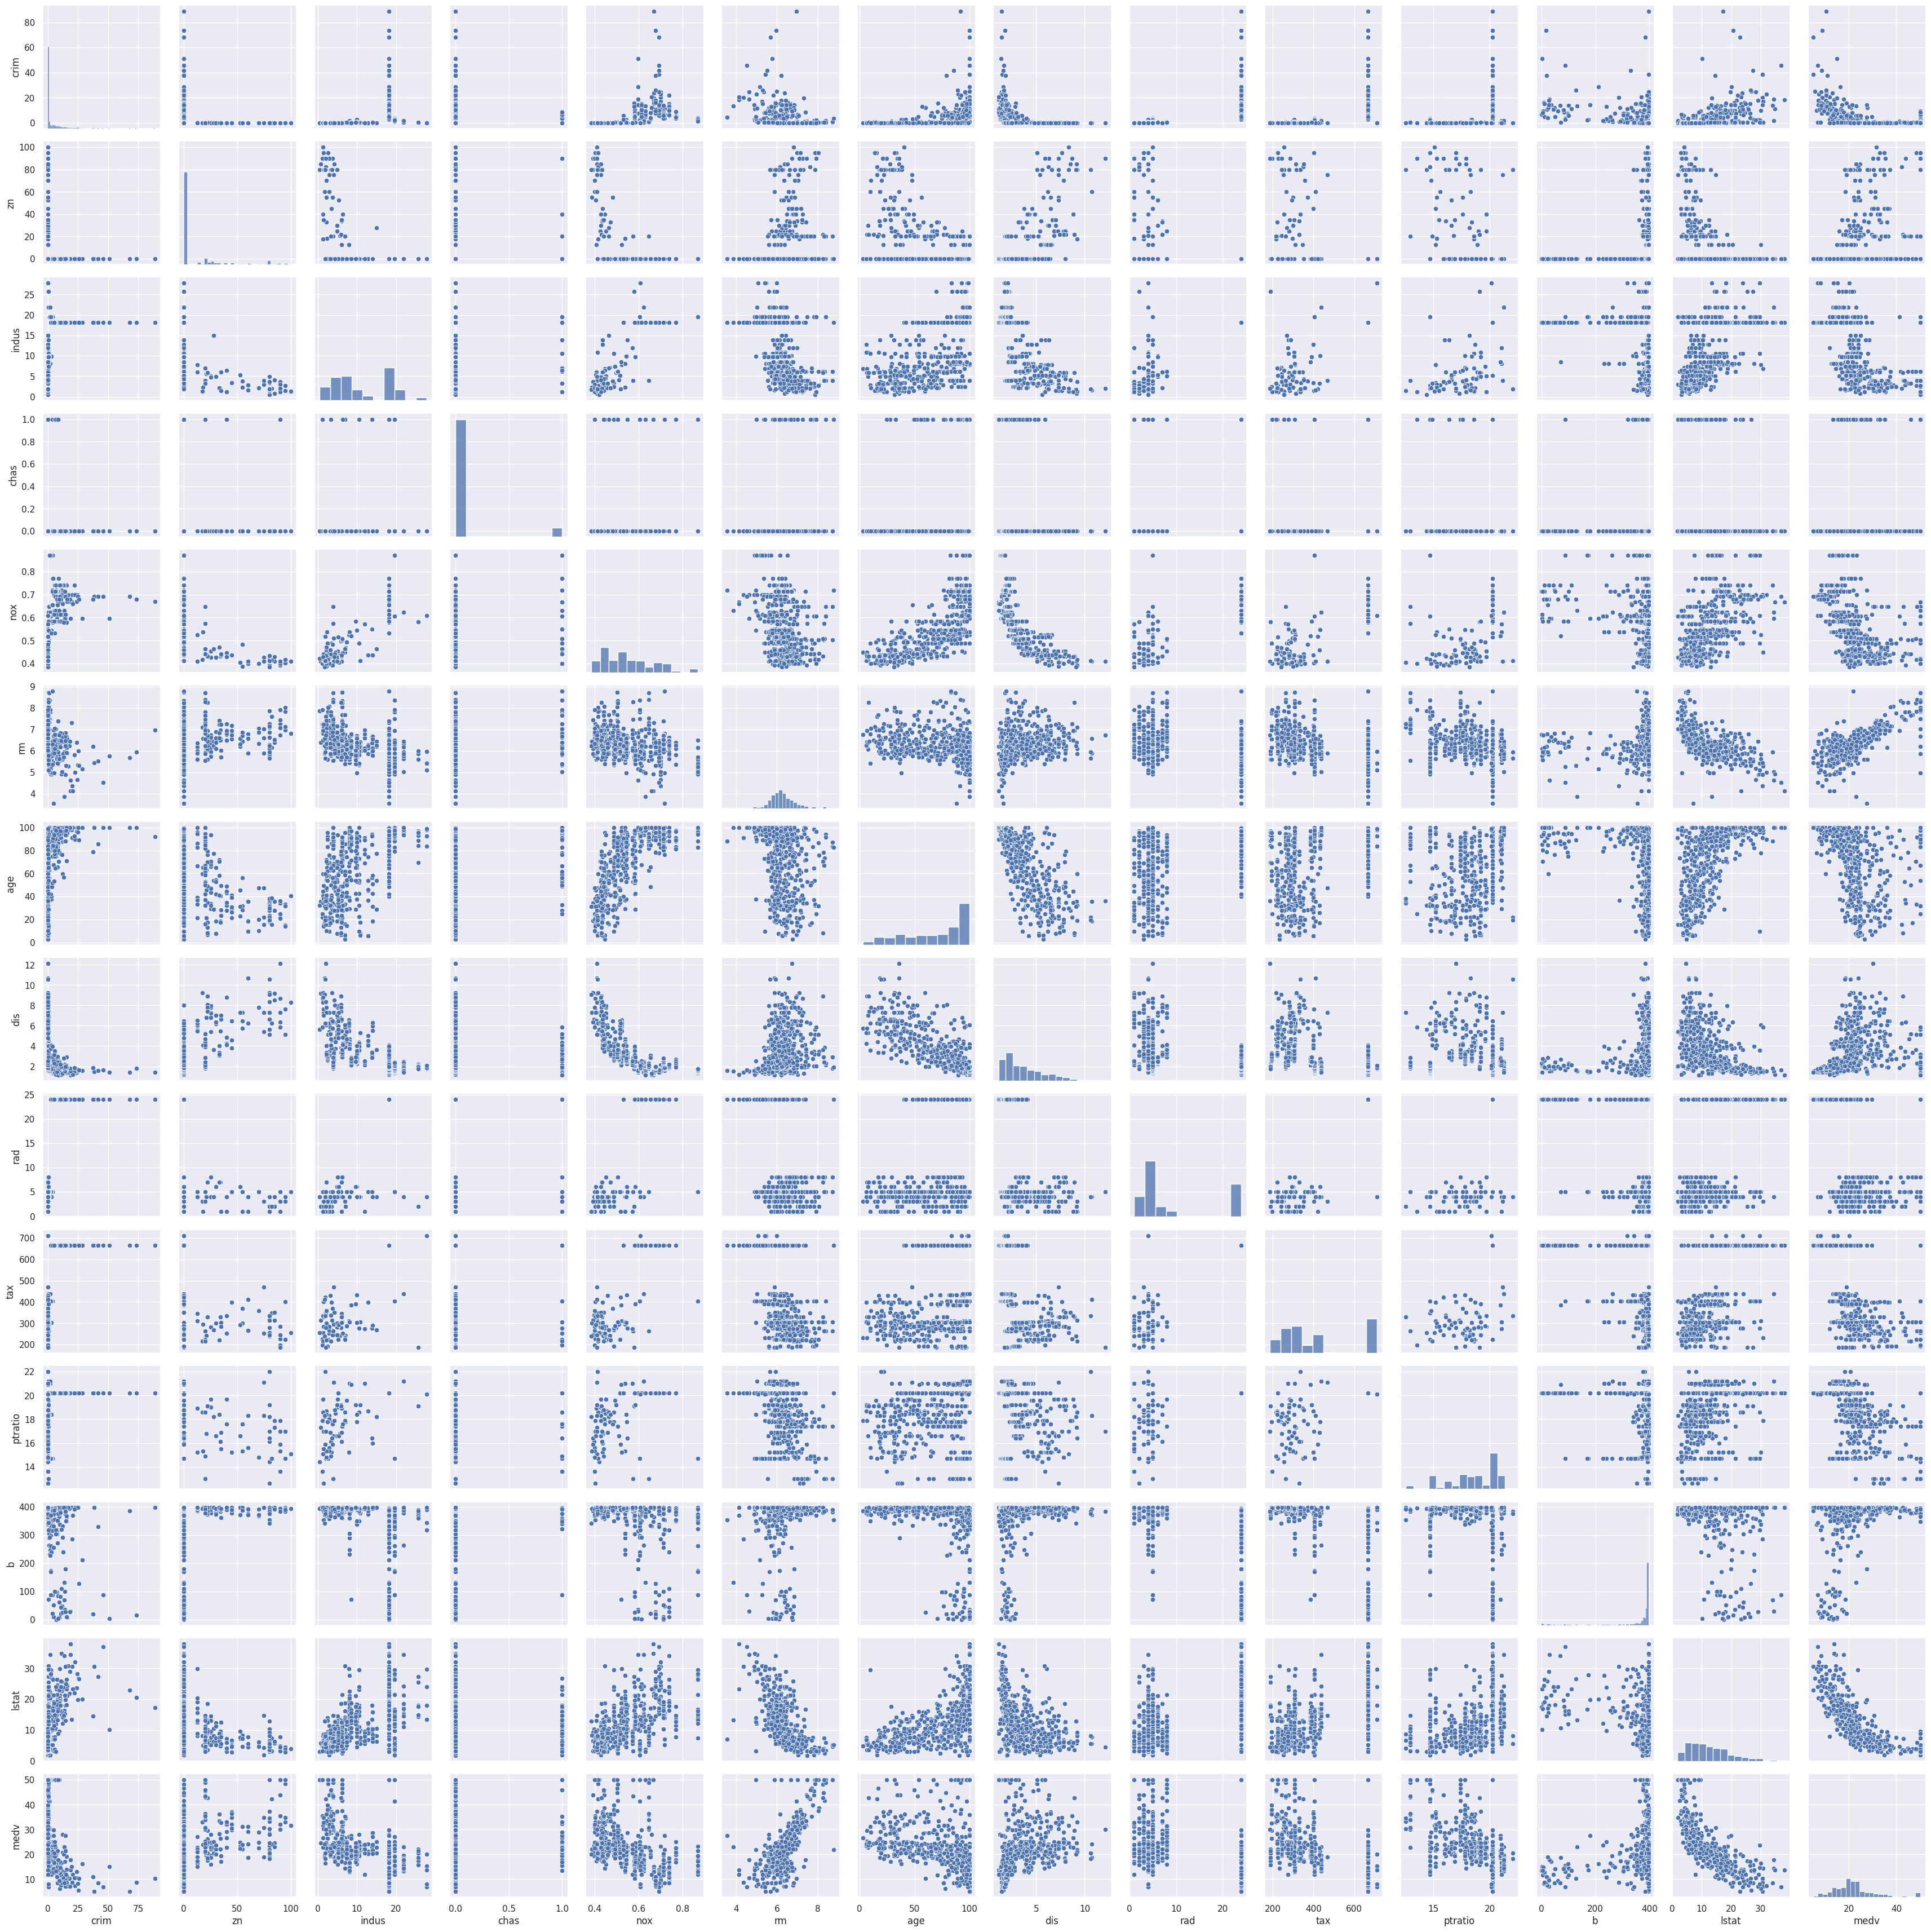

In [7]:
#pairwise relationships between the variables and the target
eda_data = df.copy()
pairgrid(data = eda_data, diag = sns.histplot, upper = sns.scatterplot, lower = sns.scatterplot)

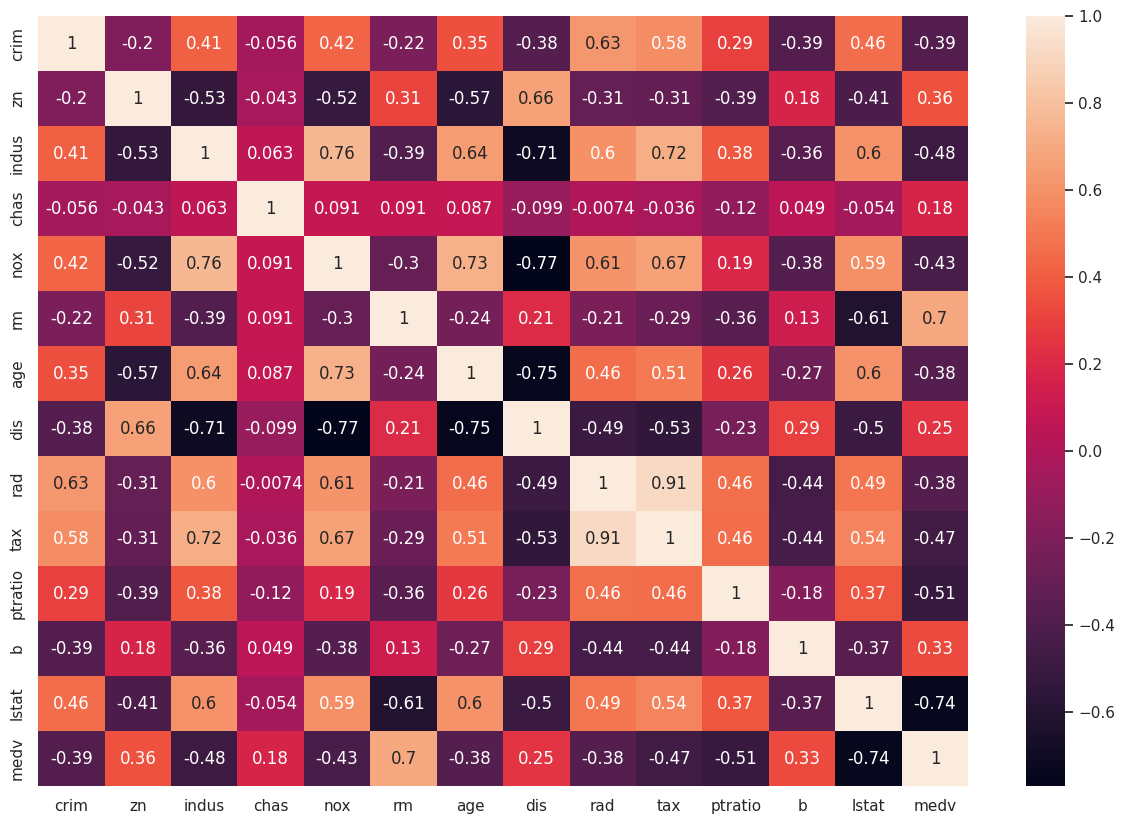

In [8]:
#correlation matrix to measure the linear relationships between the variables
sns.set(rc = {"figure.figsize" : (15, 10)})

corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.show()
#prints the values inside the square if annot is True
#the correlation coefficient ranges from -1 to 1
#if the value is close to 1, there is a strong positive correlation between the variables
#there is a strong negative correlation if the value is close to -1

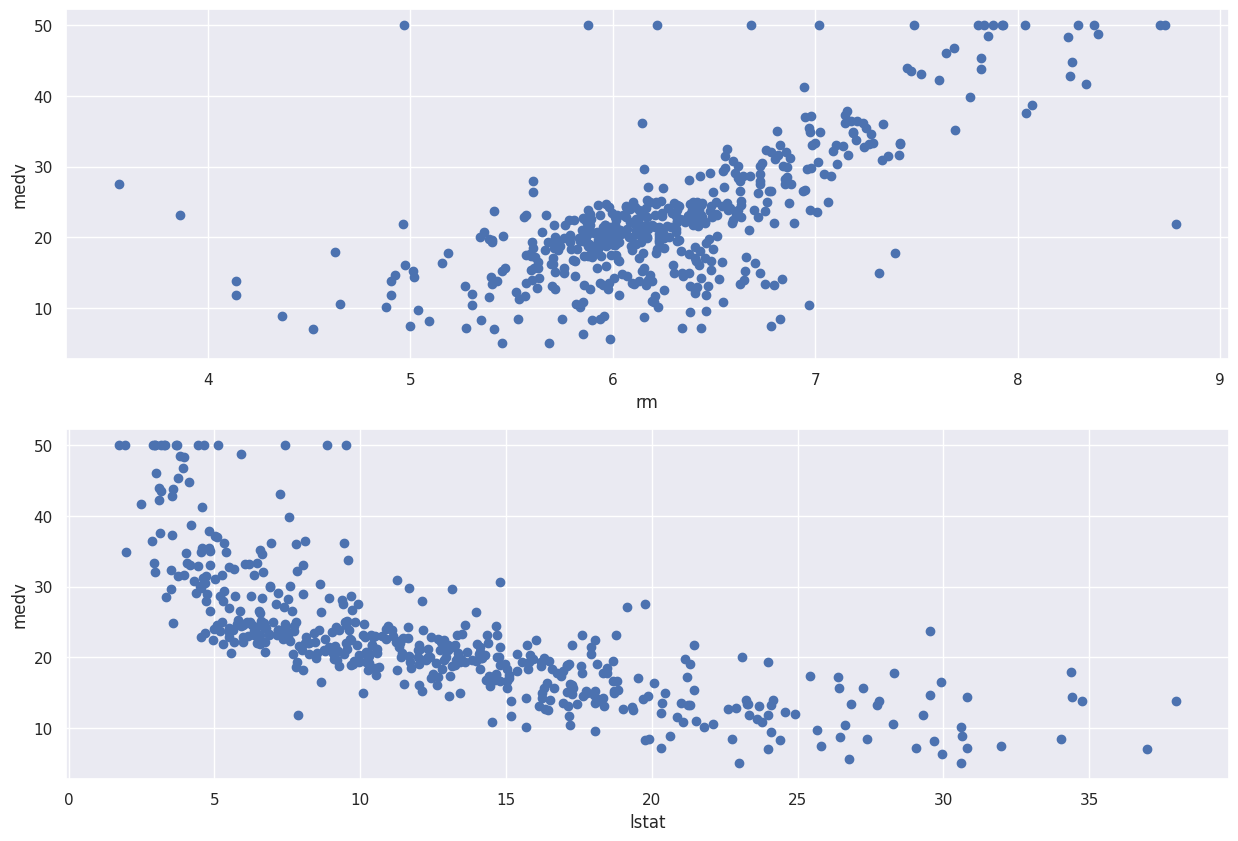

In [9]:
fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].scatter(df["rm"], df["medv"])
ax[0].set_xlabel("rm")
ax[0].set_ylabel("medv")

ax[1].scatter(df["lstat"], df["medv"])
ax[1].set_xlabel("lstat")
ax[1].set_ylabel("medv")

plt.show()

# Gradient descent


In [23]:
#now we have the train and test set
#we have to find the optimal values for w and b that minimizes the cost fuction
#using gradient descent we will try to find those values
def update_w_and_b(x, y, w, b, alpha):
    """this function updates the model parameters w and b,
    function arguments are x(input feature), y(output or the target), w, b, learning rate alpha
    """
    dl_dw = 0
    dl_db = 0
    N = len(x)
    for i in range(N):
        dl_dw += -2*x[i]*(y[i] - (w*x[i] +b))
        dl_db += -2*(y[i] - (w*x[i] + b))
    w = w - (1 / float(N)) * dl_dw*alpha
    b = b - (1 / float(N)) * dl_db*alpha
    return w, b

In [24]:
def avg_loss(x, y, w, b):
    N = len(x)
    total_error = 0
    for i in range(N):
        total_error += (y[i] - (w*x[i]+b))**2
    return total_error/float(N)

In [25]:
def predict(x, w, b):
    return w*x+b

In [26]:
from matplotlib.pyplot import figure
def train(x, y, w, b, alpha, epochs):
    """this function searches for the best value for the parameters w and b,
    it takes x, y, w and b where w and b both are initially 0,
    the function loops the training set
    """
    avg_loss_list = []
    w_list = []
    b_list = []
    img_list = []
    pred_val_at_diff_epoch = []
    for num_of_epochs in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)

        ###########################
        if num_of_epochs%5 == 0:
            avg_loss_val = avg_loss(x, y, w, b)
            w_list.append(w)
            b_list.append(b)
            avg_loss_list.append(avg_loss_val)
        if num_of_epochs%2500 == 0:
            avg_loss_val = avg_loss(x, y, w, b)
            print("epoch: ", num_of_epochs,"average loss: ",avg_loss_val)
            figure(figsize = (15, 10))
            plt.title(f"Epoch: {num_of_epochs}")
            plt.xlabel("X")
            plt.ylabel("y")
            plt.xlim(0, 9)
            plt.ylim(0, 50)
            plt.scatter(x, y)
            plt.scatter(x, predict(x, w, b))

            plt.savefig(f"{num_of_epochs}.png")
            img_list.append(f"{num_of_epochs}.png")

            plt.show()
            ####################################

            pred_val_at_diff_epoch.append(predict(x[0], w, b))
    return w_list,b_list, avg_loss_list, w, b, img_list, pred_val_at_diff_epoch

epoch:  0 average loss:  482.27751843298887


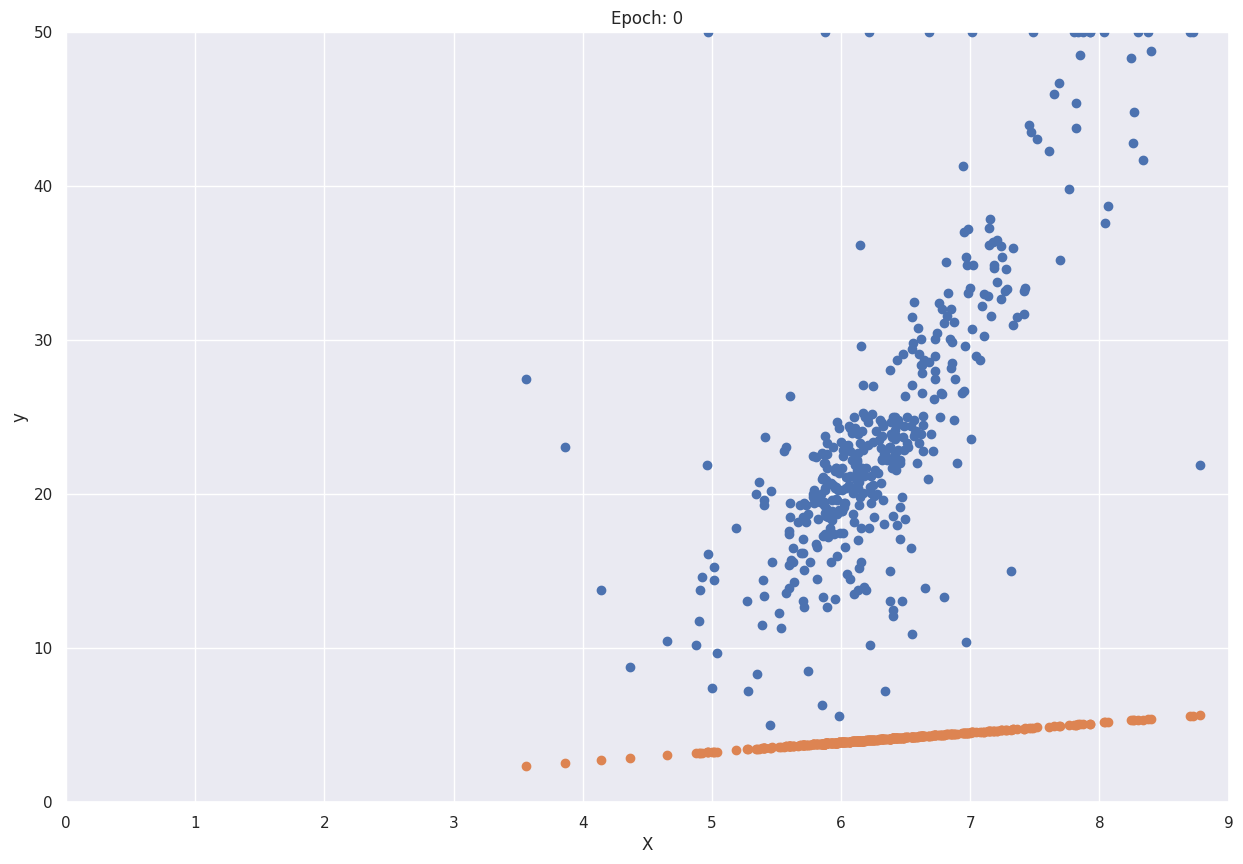

epoch:  2500 average loss:  51.17442728918249


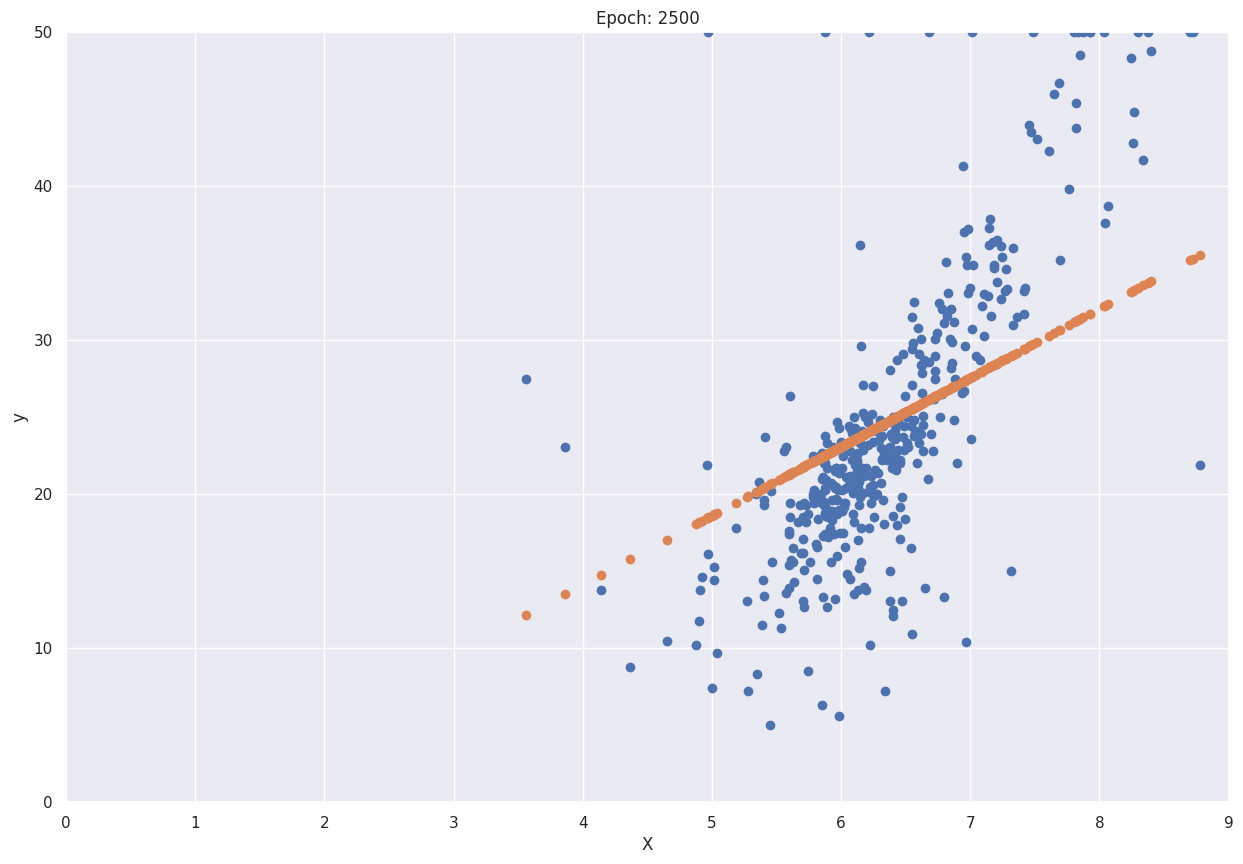

epoch:  5000 average loss:  48.13962307586977


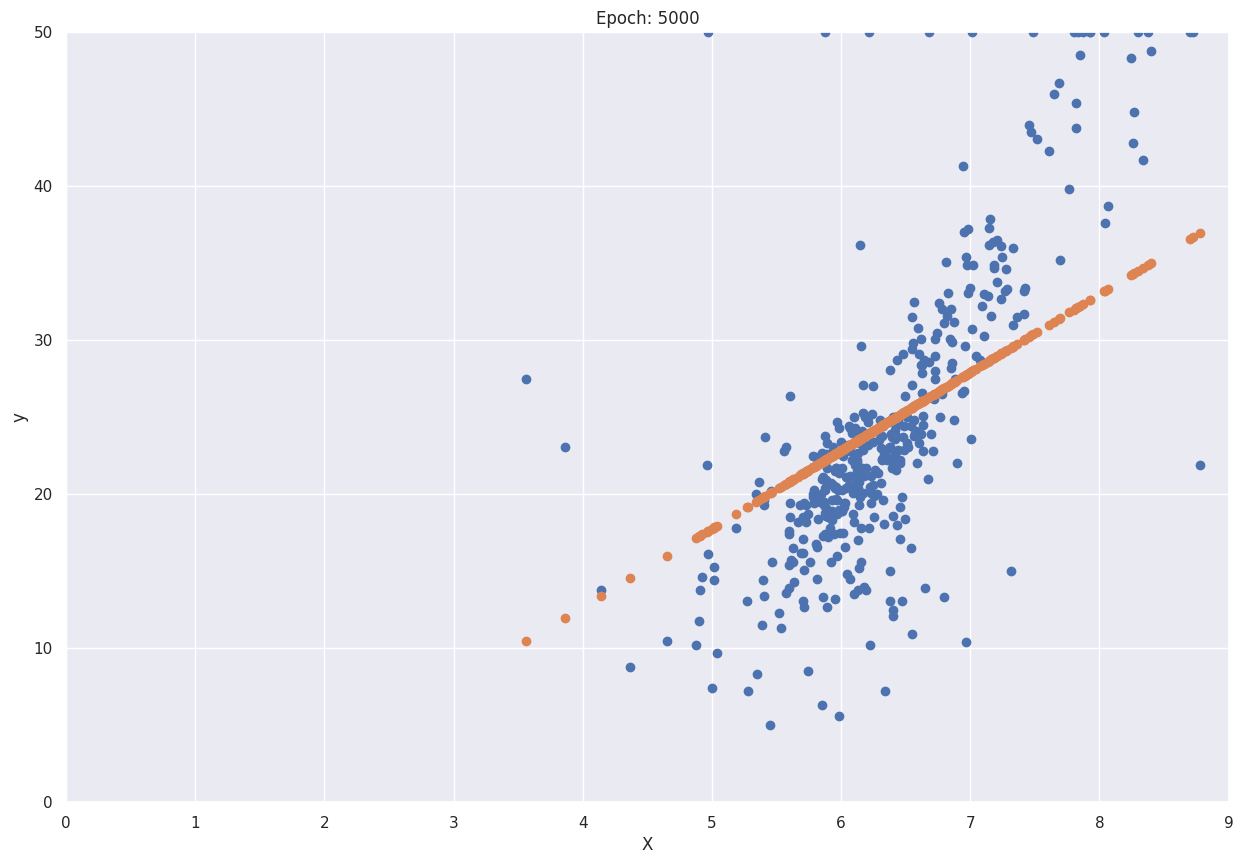

epoch:  7500 average loss:  45.79198908777717


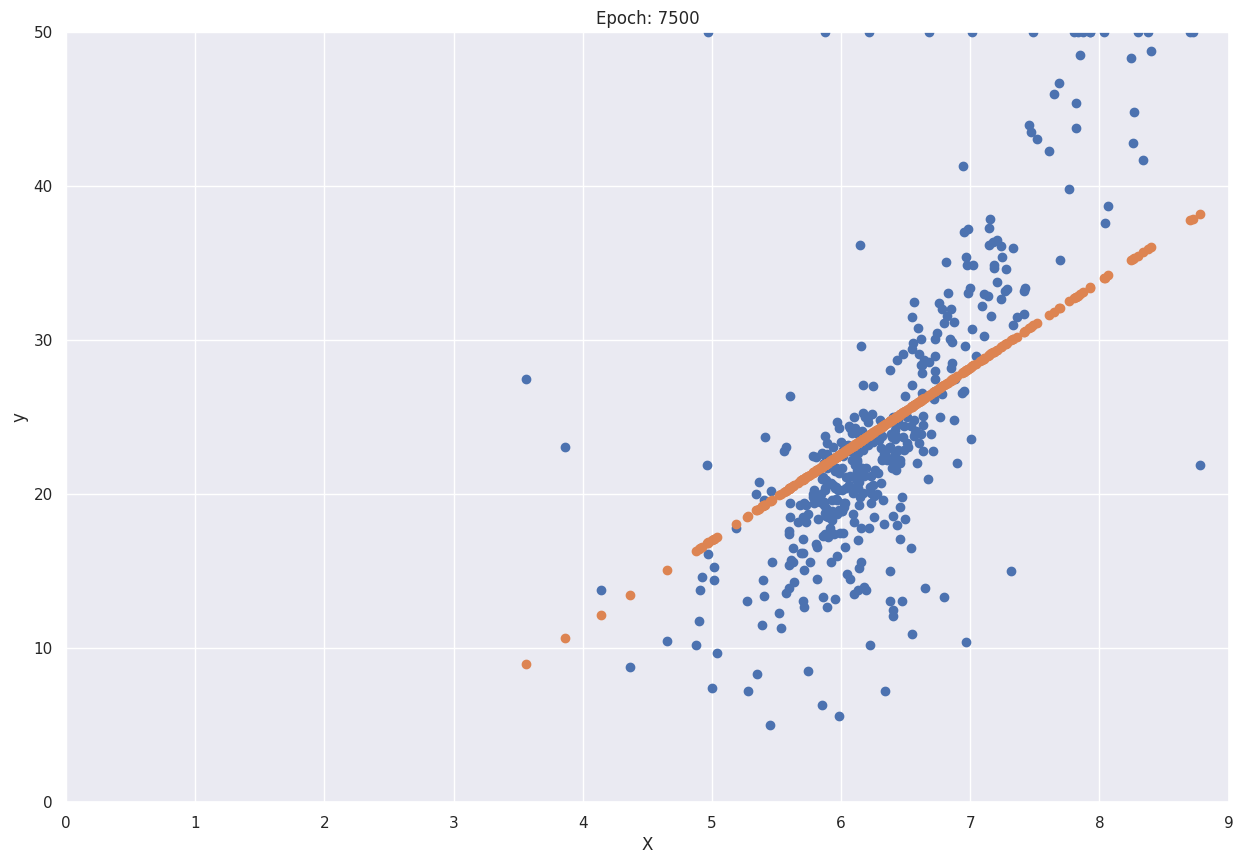

epoch:  10000 average loss:  43.97592948239271


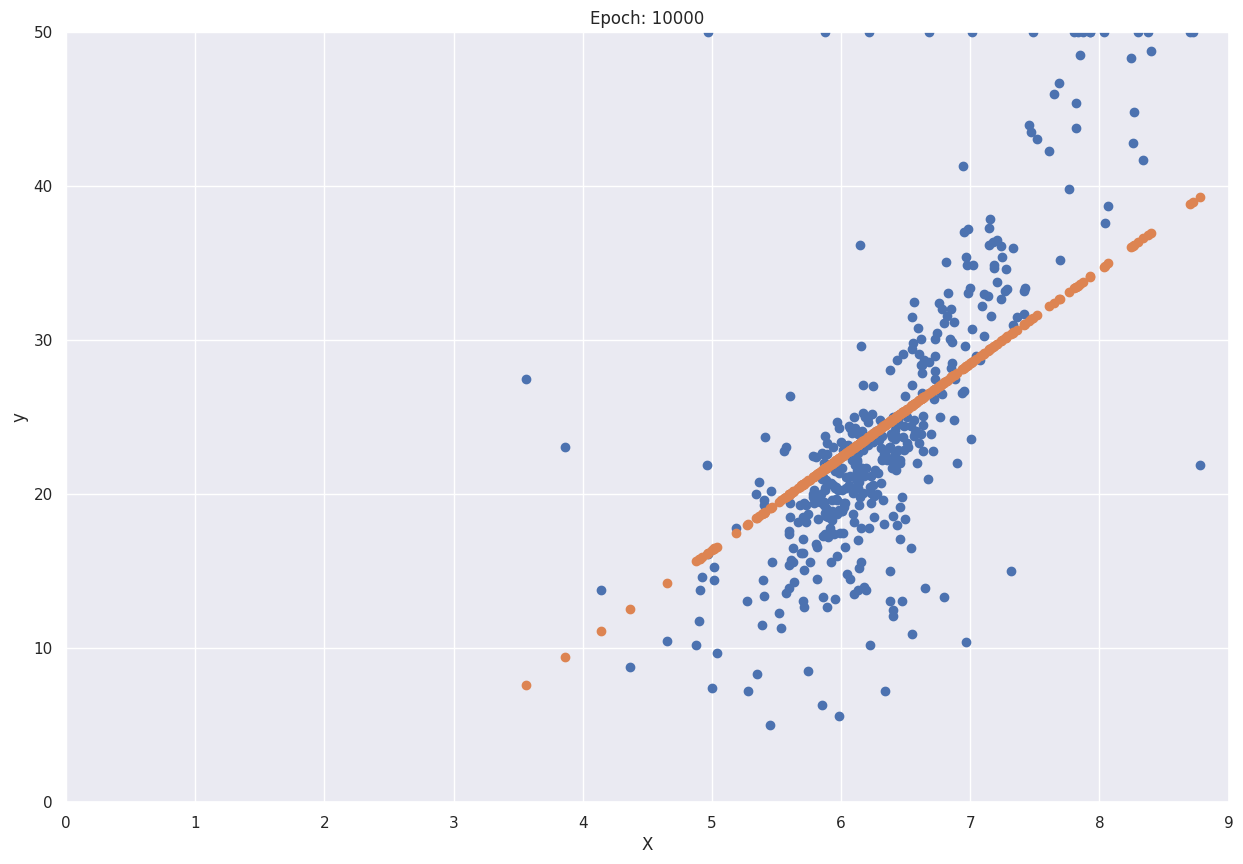

epoch:  12500 average loss:  42.57107995855844


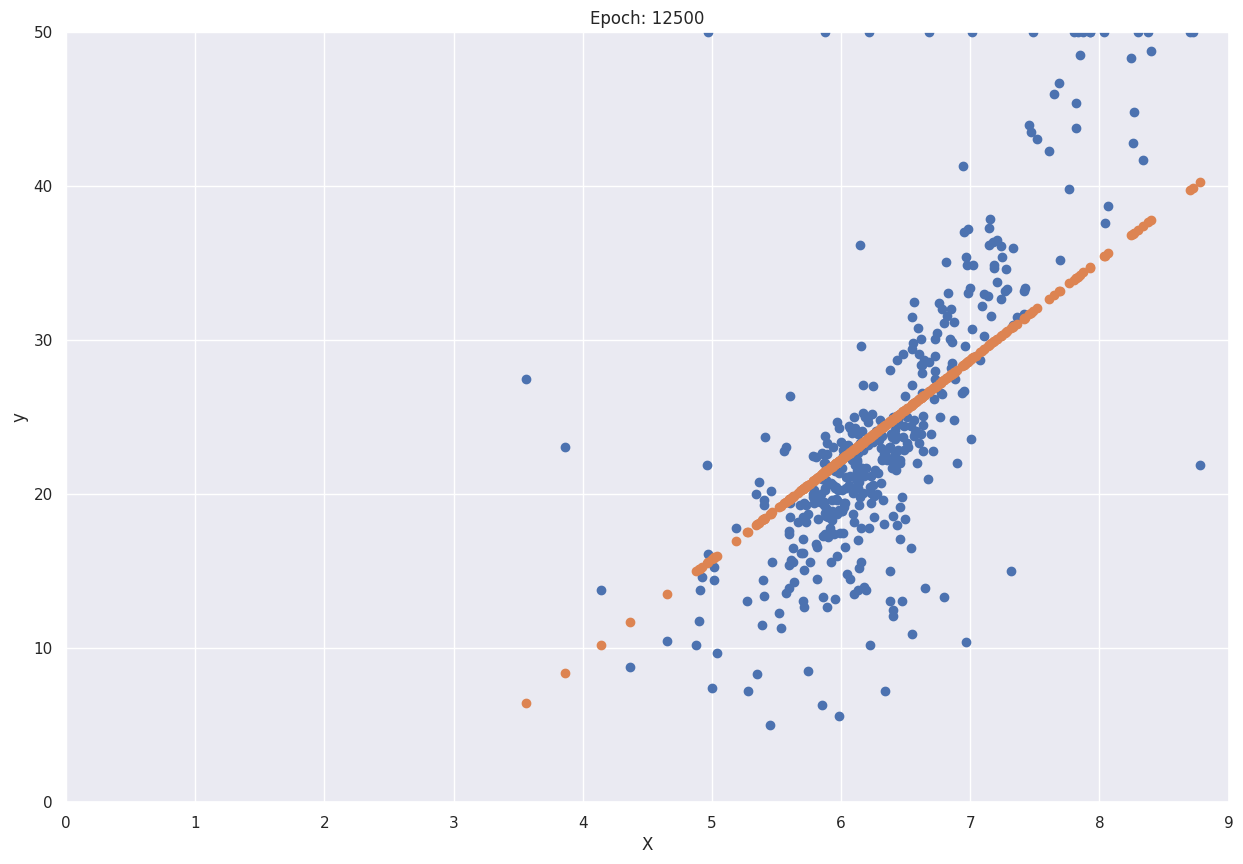

epoch:  15000 average loss:  41.4843302842824


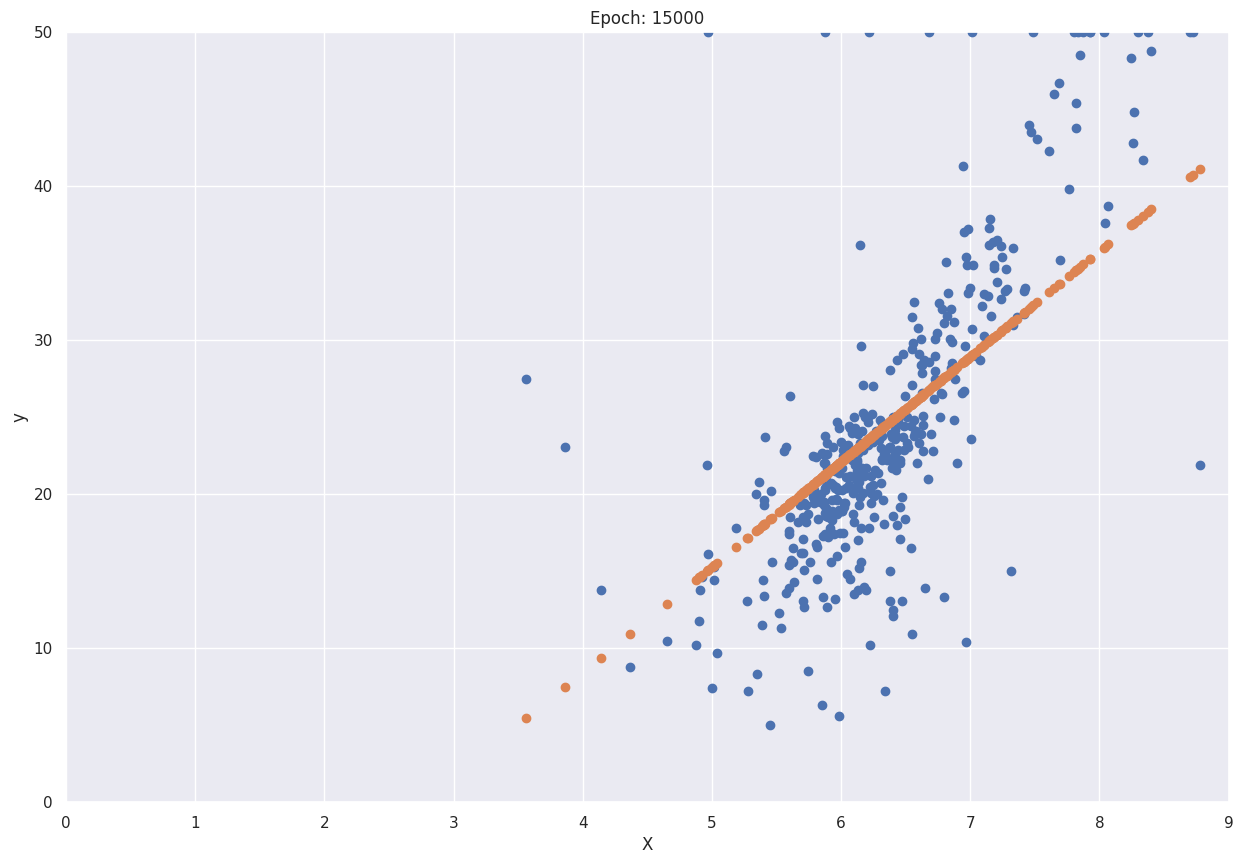

epoch:  17500 average loss:  40.643653162283115


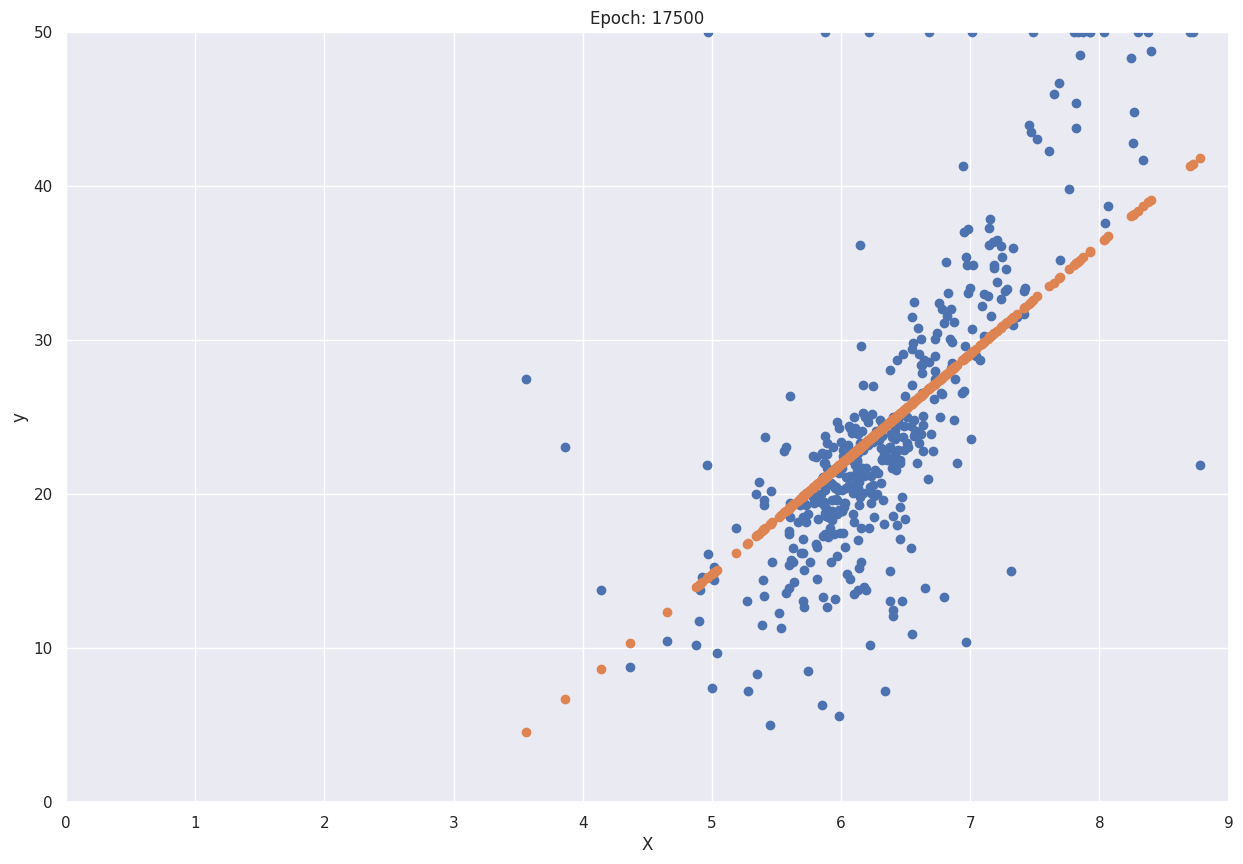

epoch:  20000 average loss:  39.993330424506574


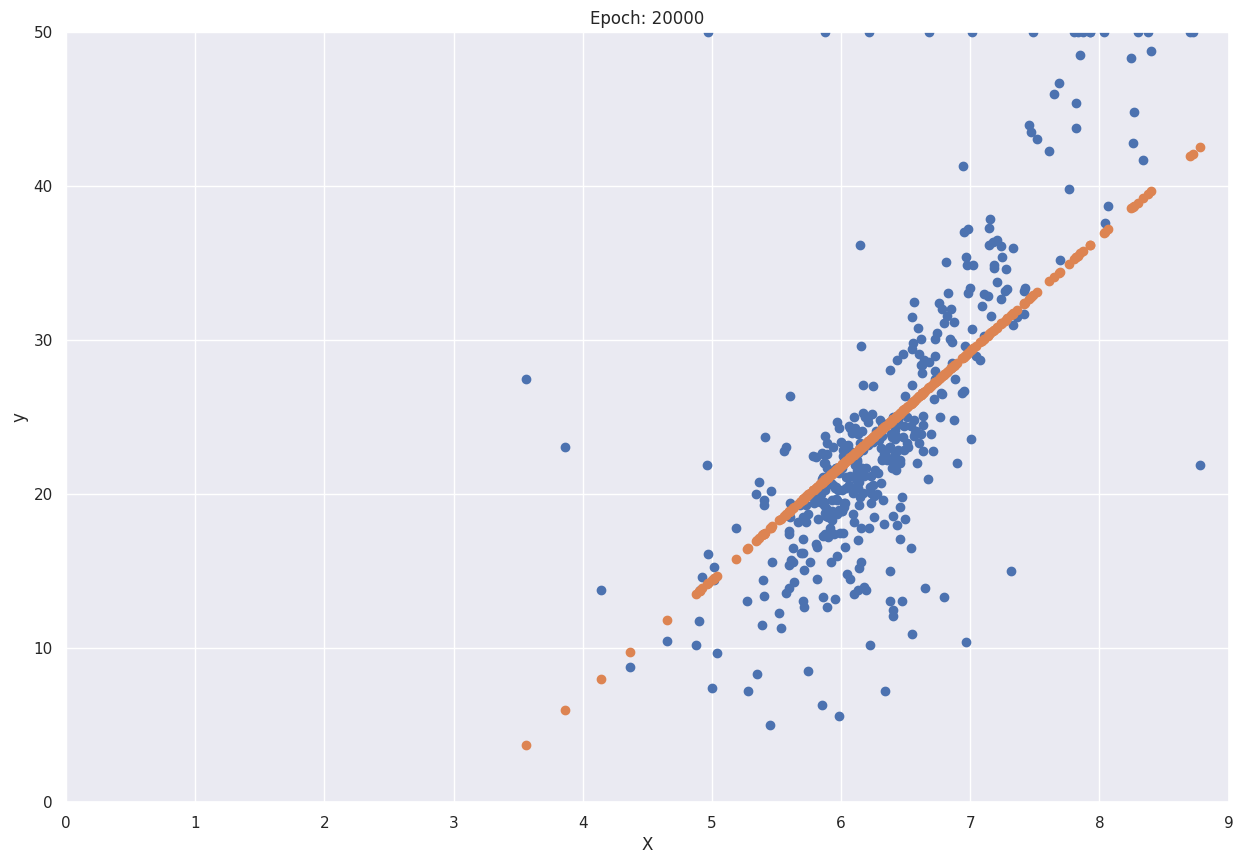

epoch:  22500 average loss:  39.49026015864344


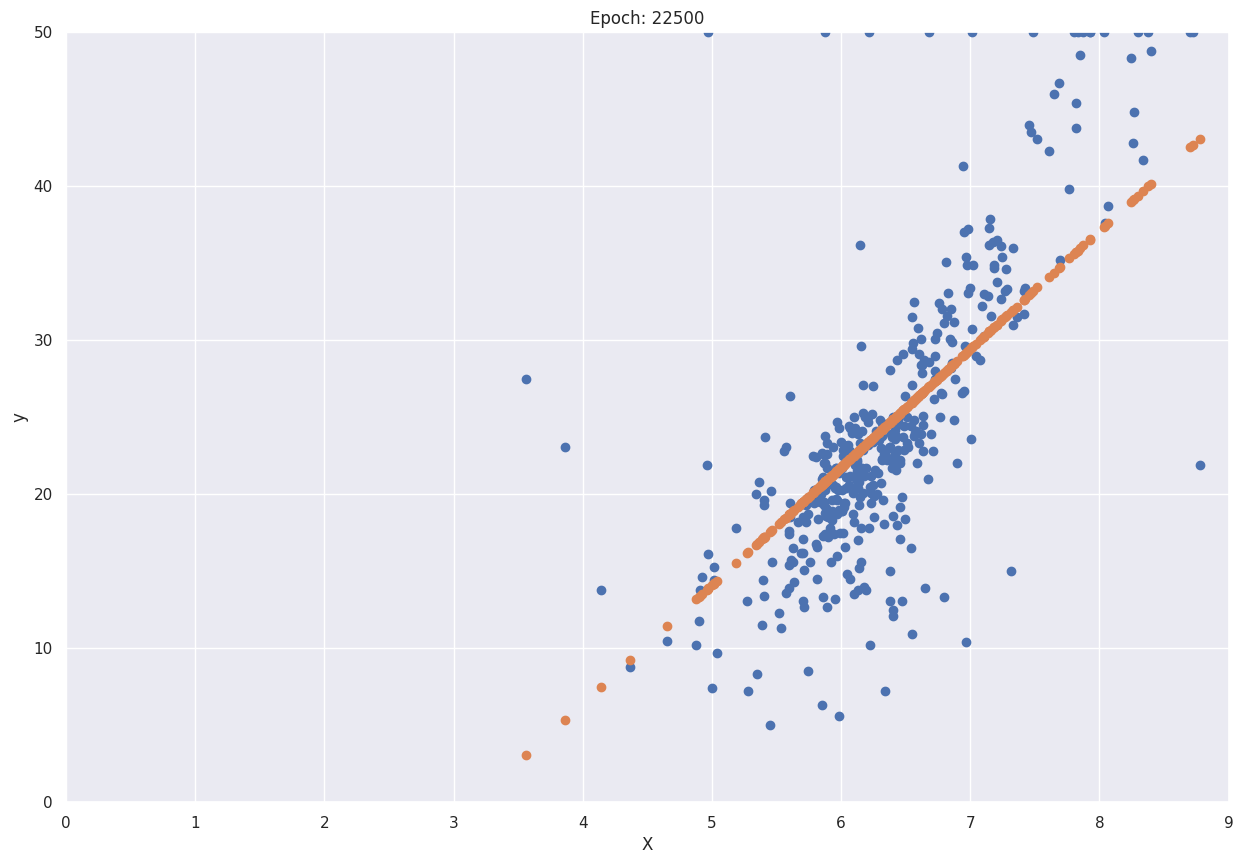

epoch:  25000 average loss:  39.101100011389725


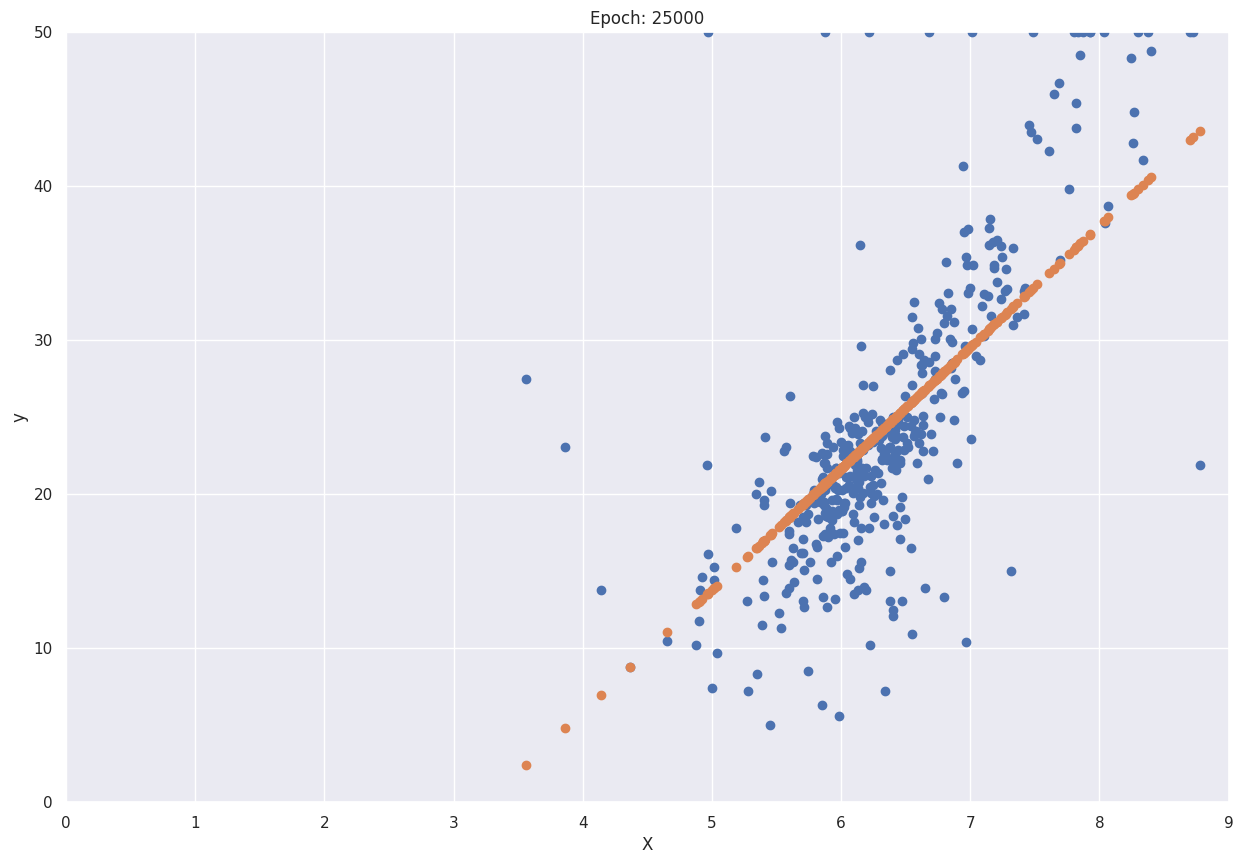

epoch:  27500 average loss:  38.80005733308564


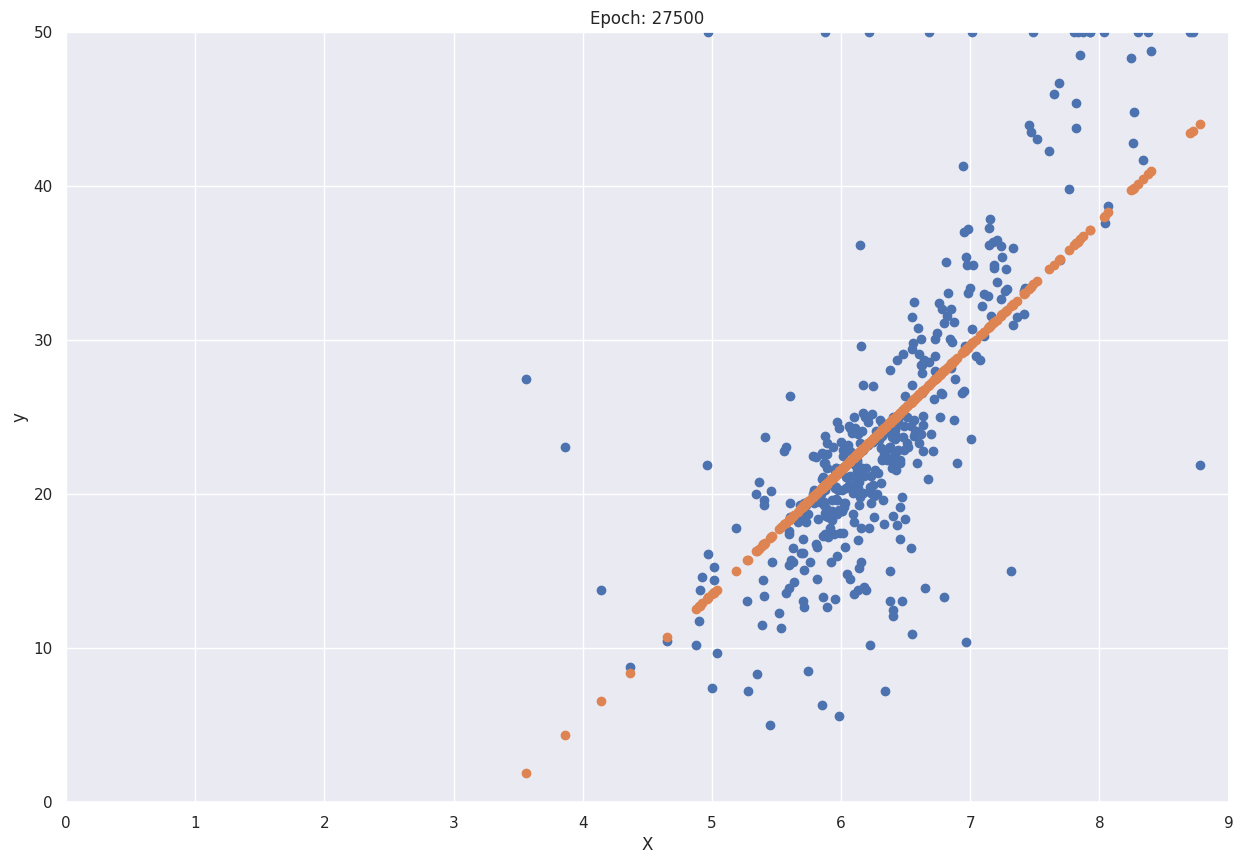

epoch:  30000 average loss:  38.56717969954581


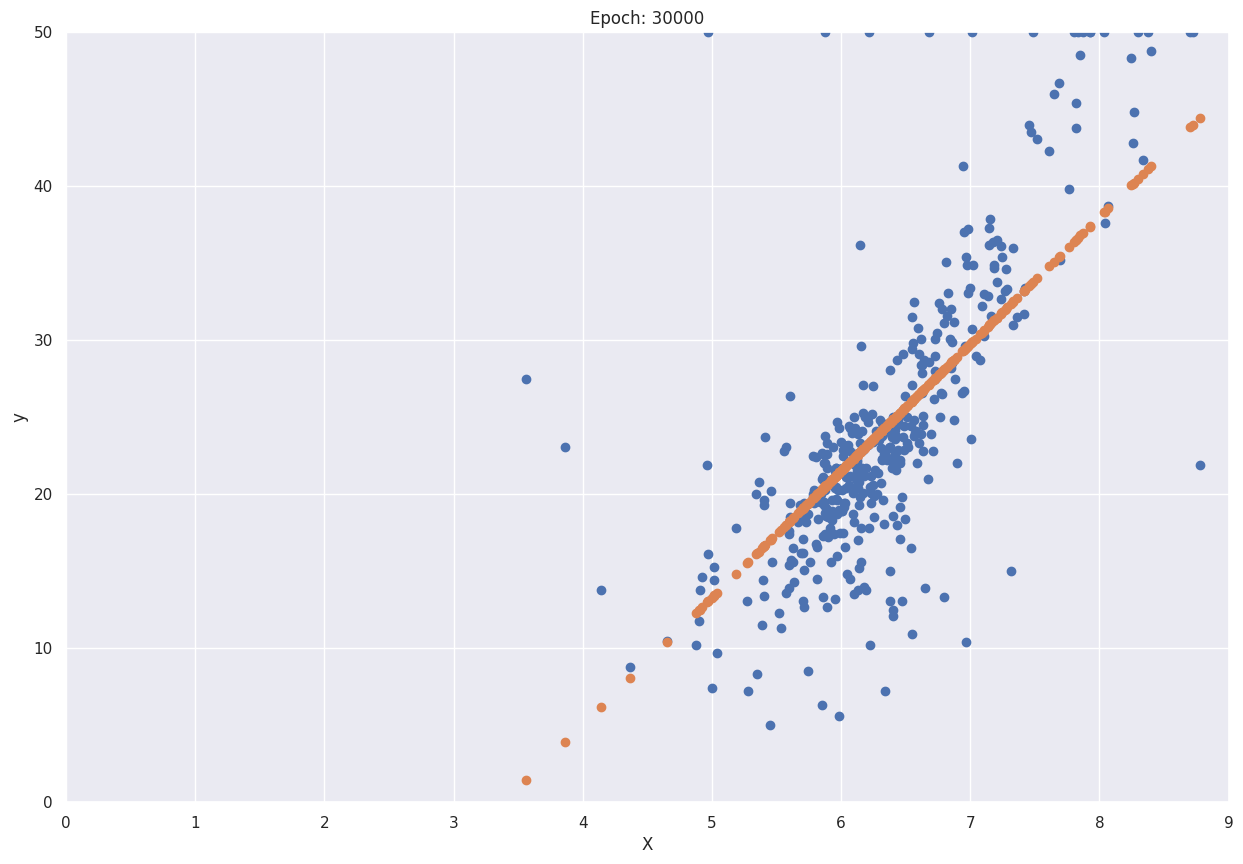

epoch:  32500 average loss:  38.38703251075306


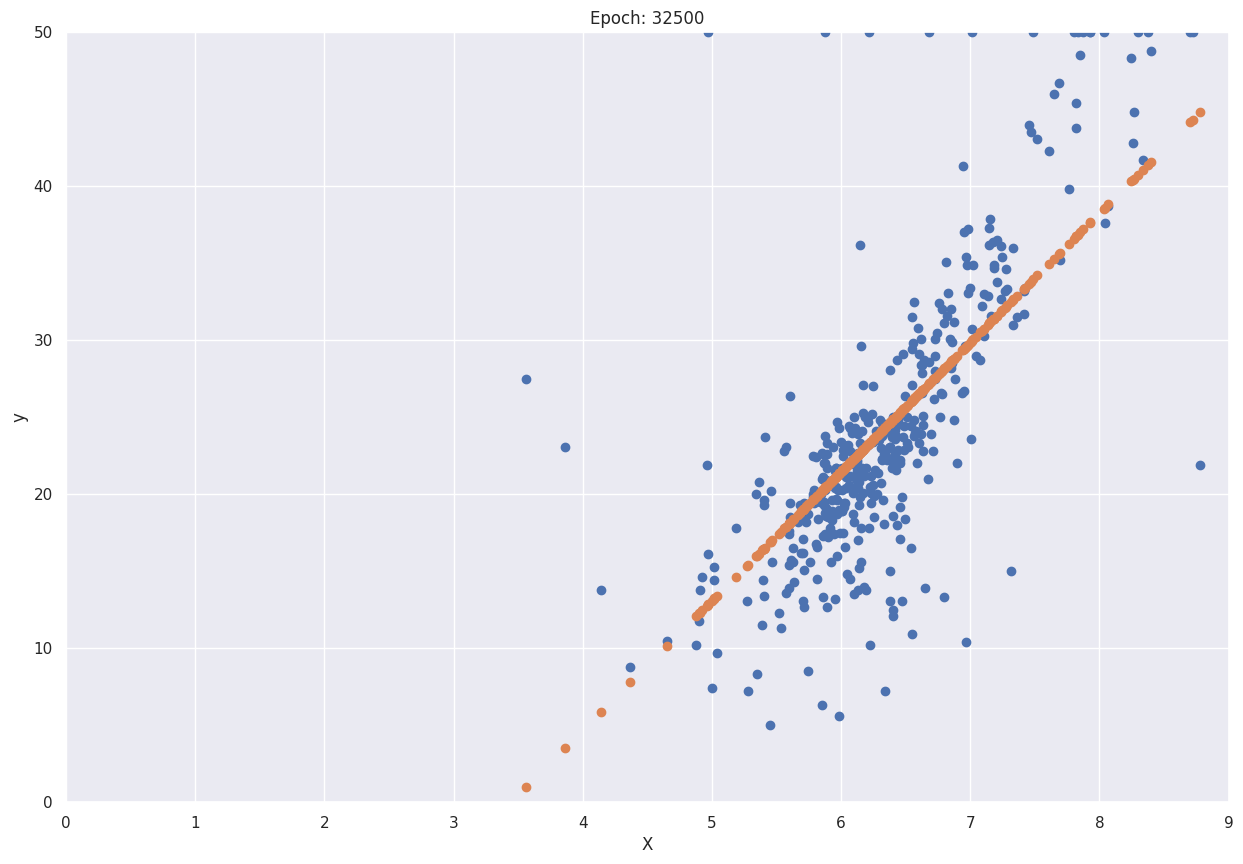

epoch:  35000 average loss:  38.2476760206658


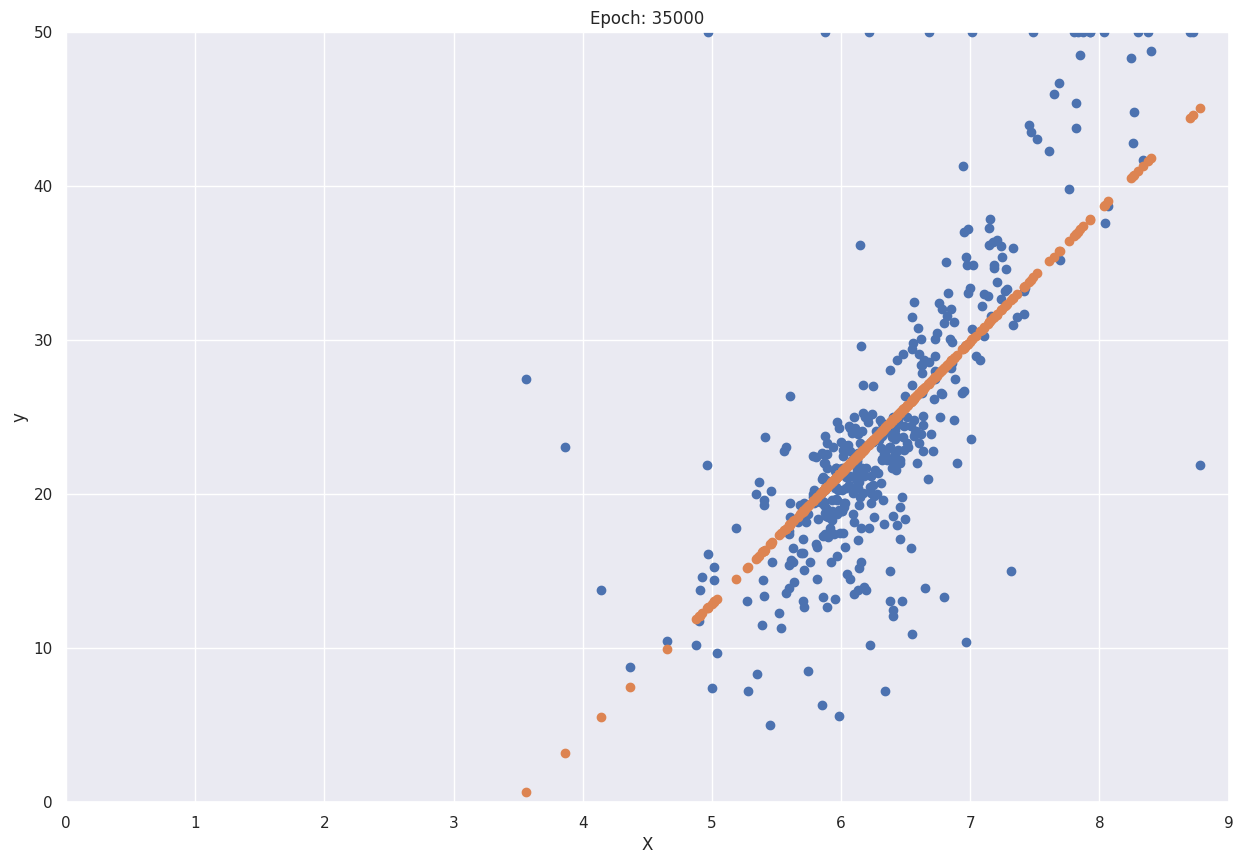

epoch:  37500 average loss:  38.13987399799993


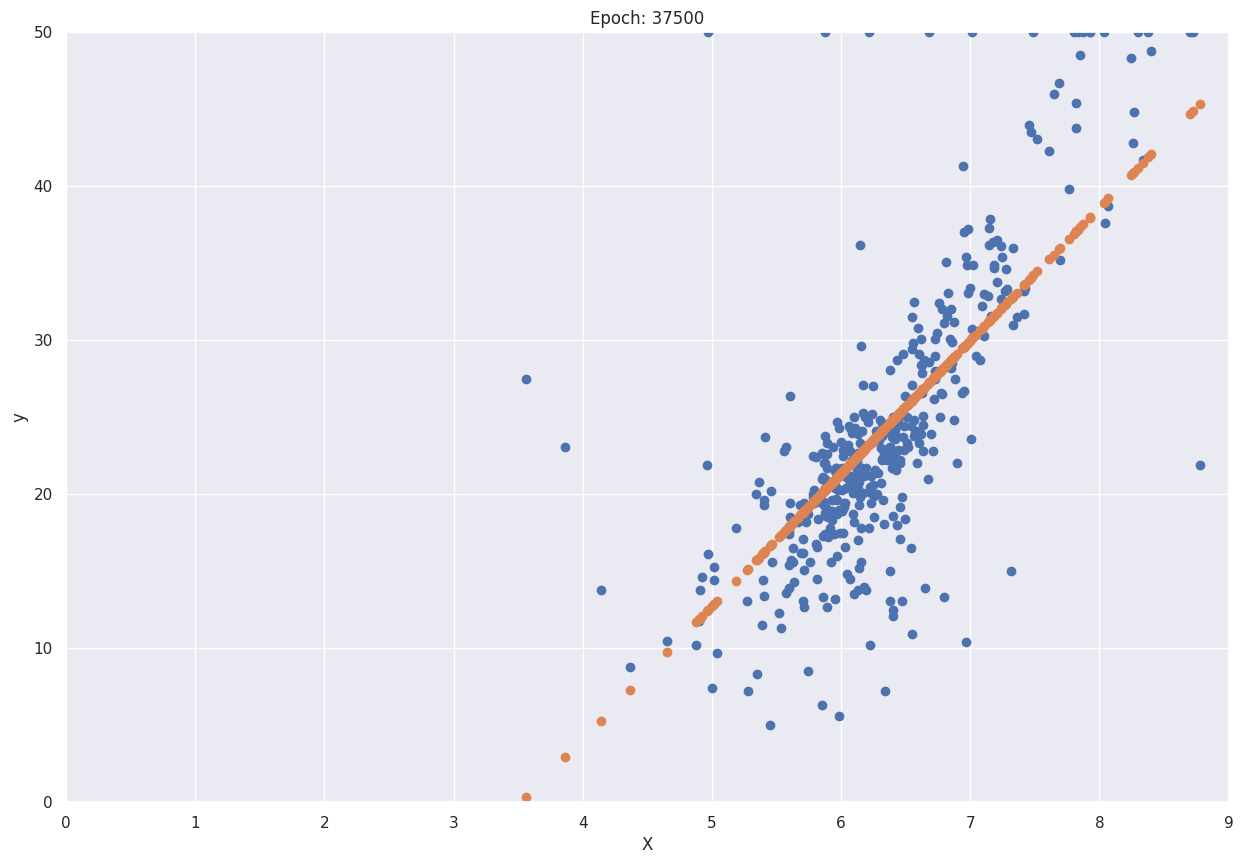

epoch:  40000 average loss:  38.05648156982104


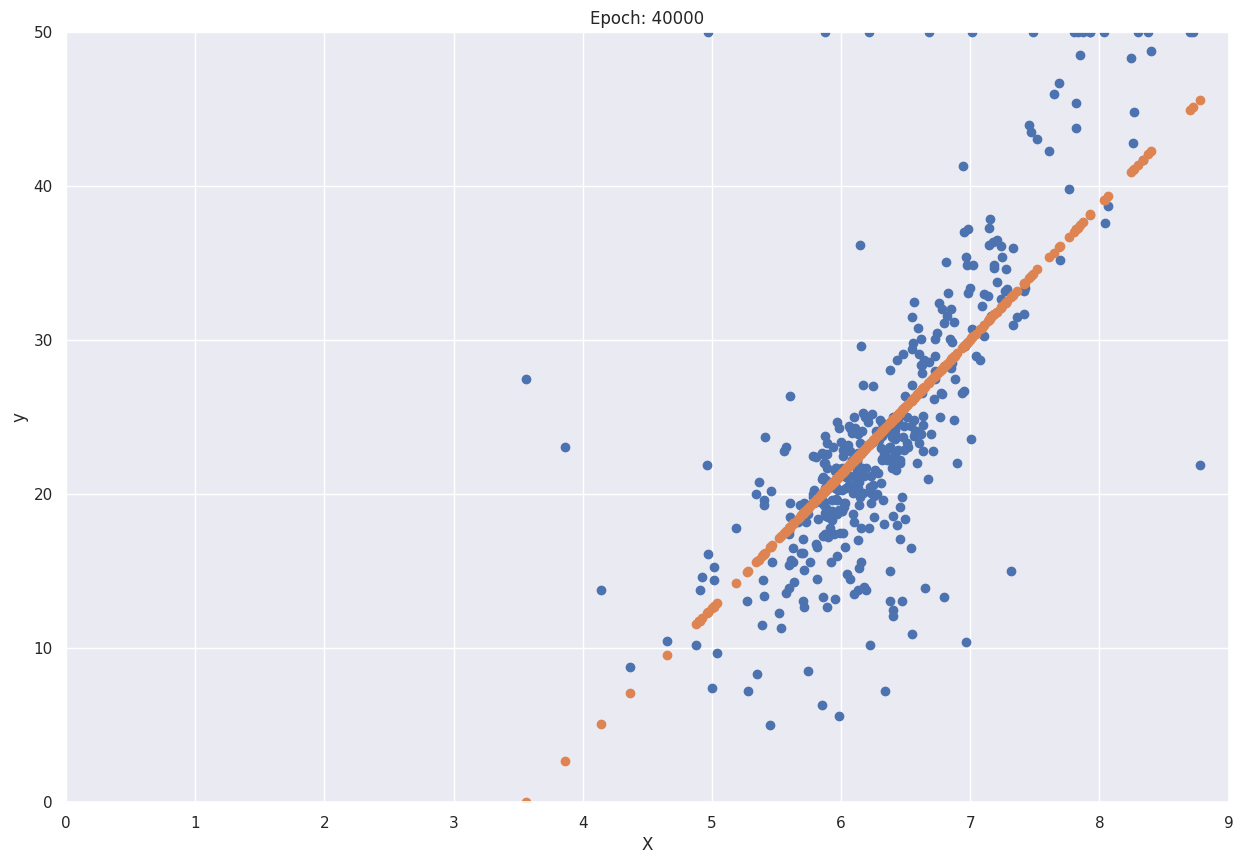

epoch:  42500 average loss:  37.99197167561321


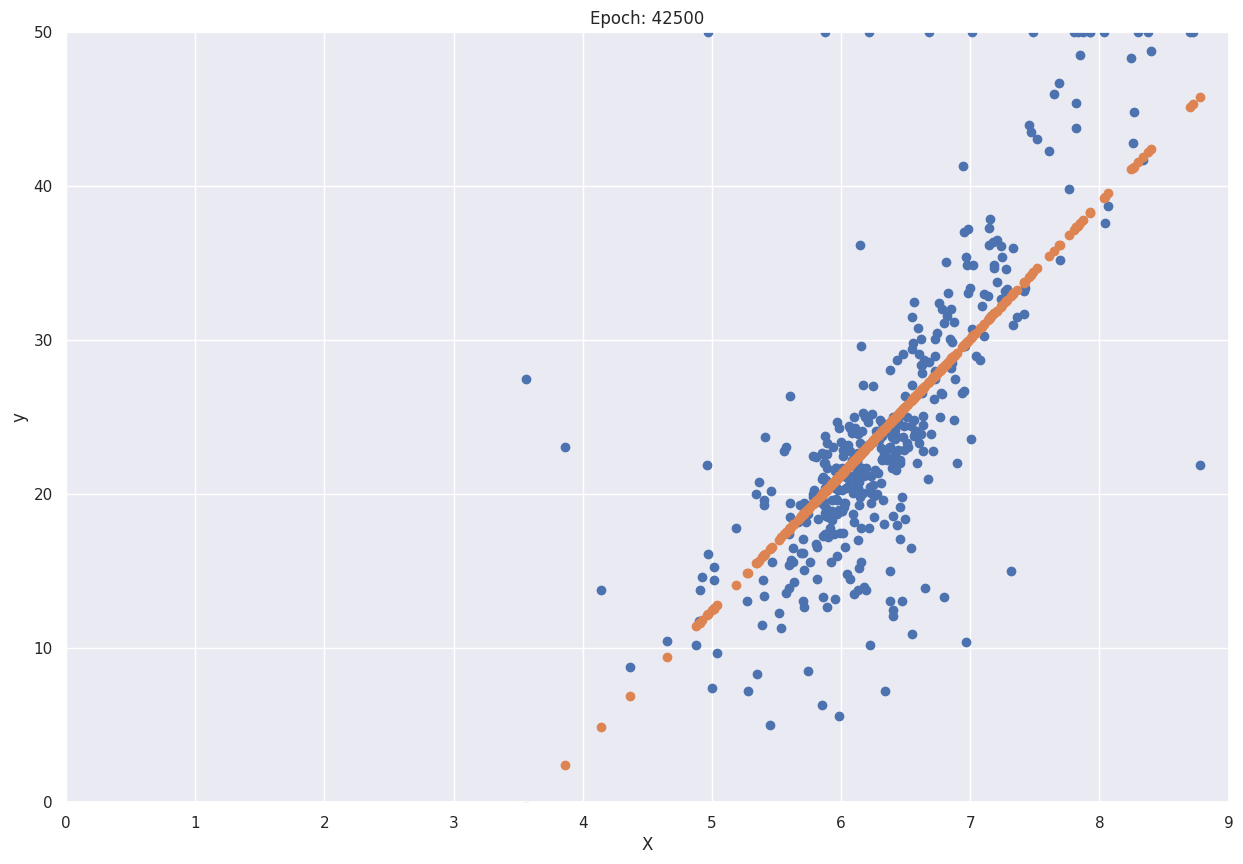

epoch:  45000 average loss:  37.94206874627558


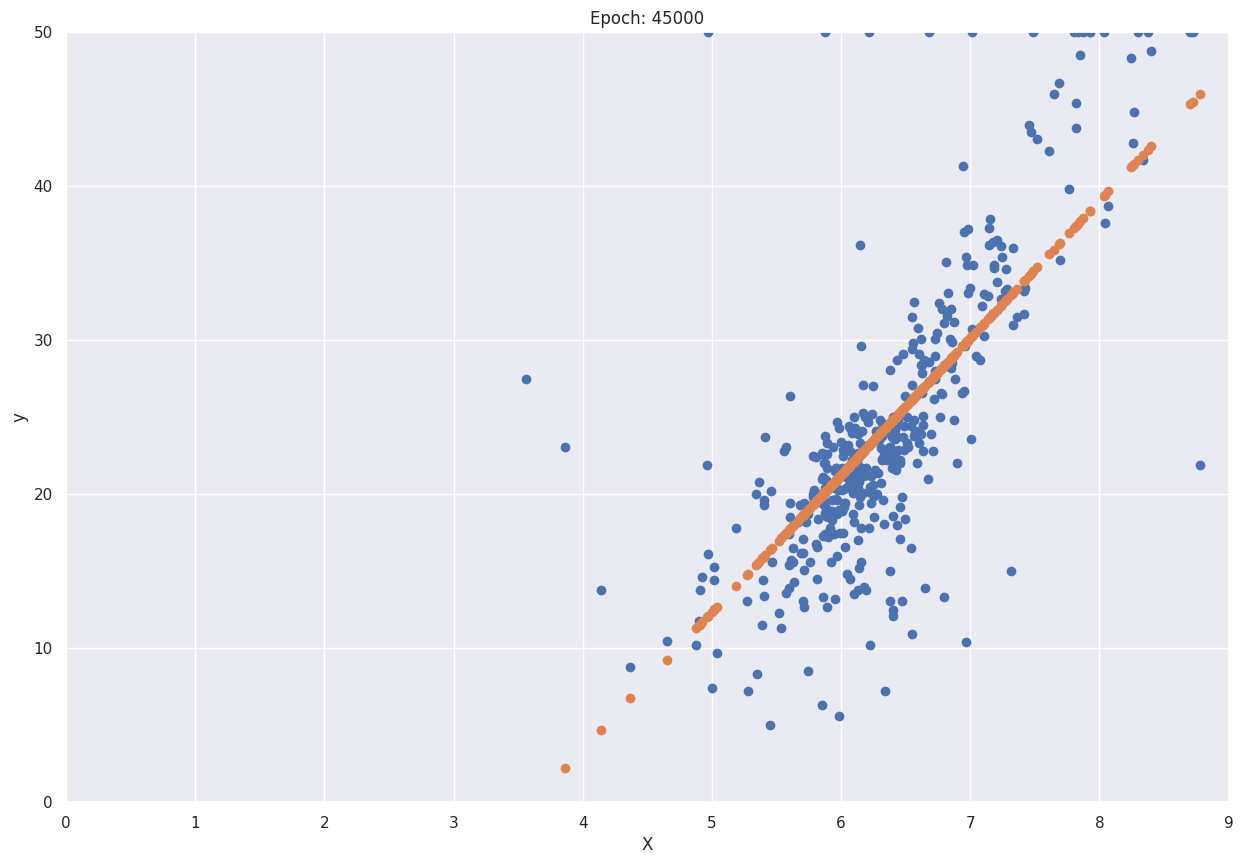

epoch:  47500 average loss:  37.90346532912447


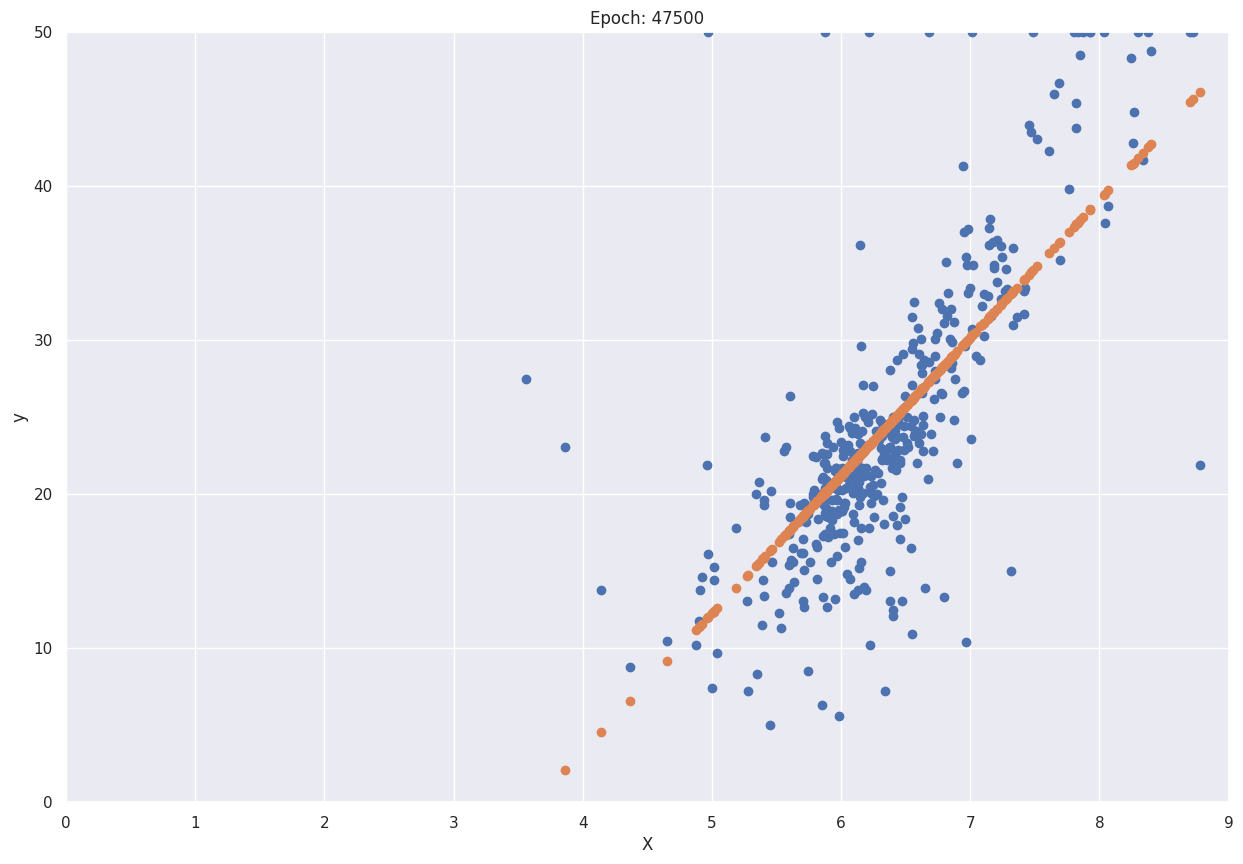

In [27]:
#first we will experiment using "RM" (x) and "MEDV" (y)
w_list,b_list, avg_loss_list, w, b, img_list, pred_val_at_diff_epoch = train(df['rm'][:404], df['medv'][:404], 0, 0, 0.002, 50_000)

In [28]:
print(len(w_list))
print(len(b_list))
print(len(avg_loss_list))
print("best value for w: ",w)
print("best value for b: ",b)
print(len(img_list))
print(len(pred_val_at_diff_epoch))

10000
10000
10000
best value for w:  9.021808399907732
best value for b:  -32.9245939979822
20
20


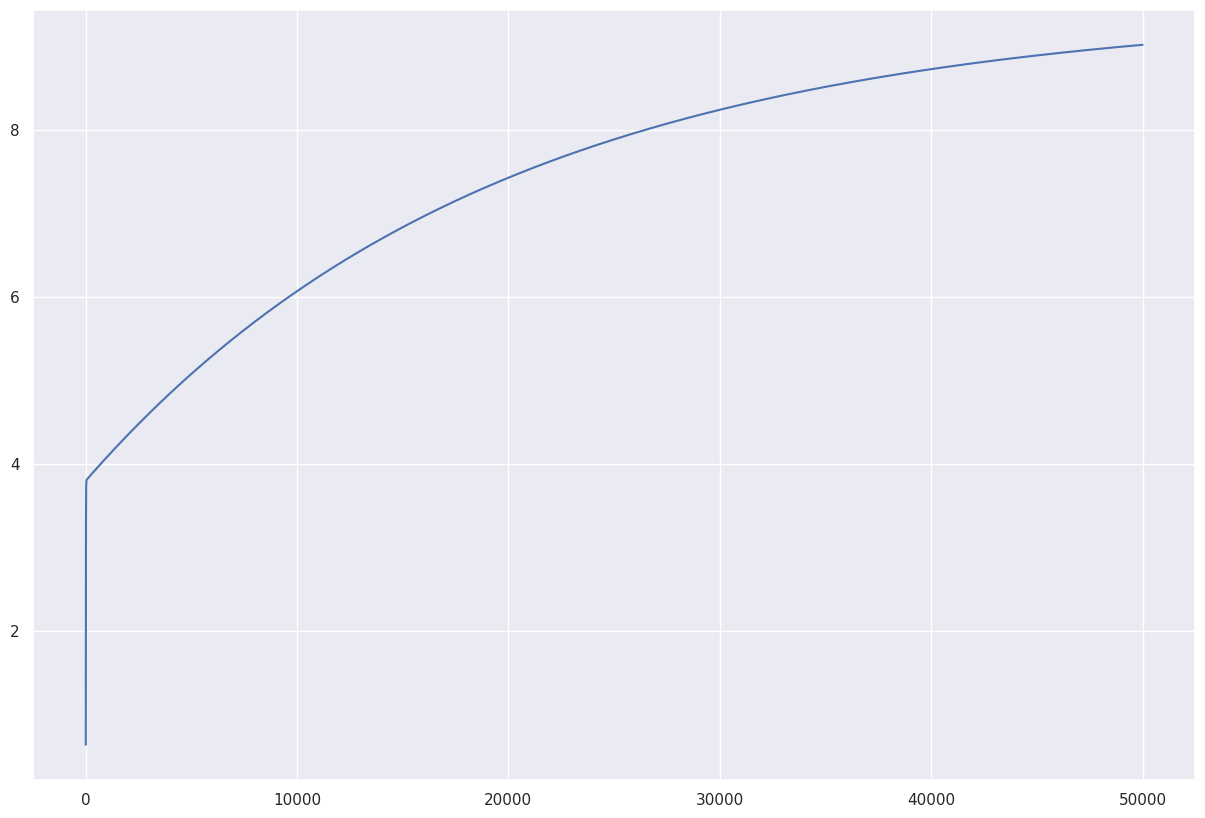

In [54]:
n = np.linspace(10, 50000, 10000, endpoint = True)
len(n), n
plt.plot(n, w_list)
plt.show()

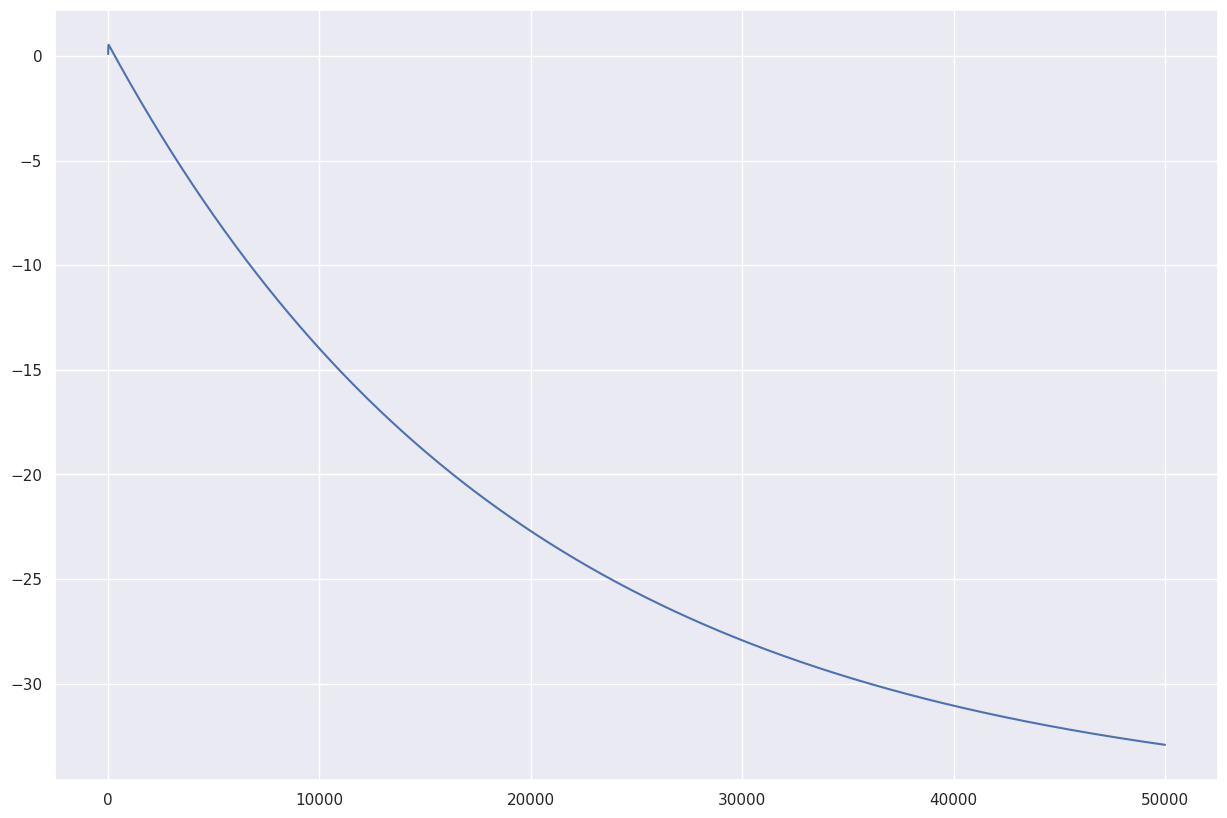

In [55]:
plt.plot(n, b_list)
plt.show()

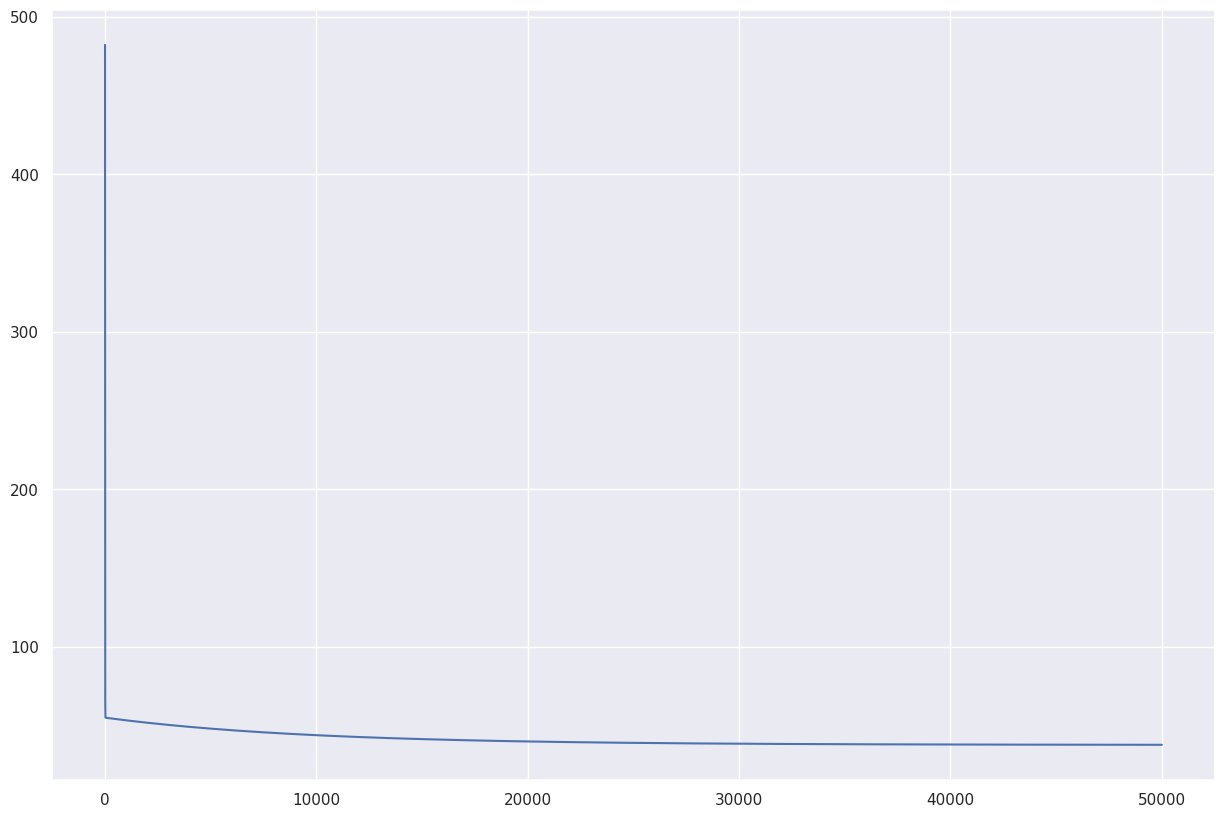

In [56]:
plt.plot(n, avg_loss_list)
plt.show()

In [49]:
predicted_vals = []
for feature in df["rm"][404:]:
    predicted_vals.append(predict(feature, w, b))

In [50]:
predictedY_vs_realY = pd.DataFrame()

In [51]:
predictedY_vs_realY["REAL Y"] = df["medv"][404:]
predictedY_vs_realY["PREDICTED Y"] = predicted_vals
predictedY_vs_realY["ERROR"] = abs(predictedY_vs_realY["REAL Y"] - predictedY_vs_realY["PREDICTED Y"])

In [52]:
predictedY_vs_realY.head(20)

,REAL Y,PREDICTED Y,ERROR
404,8.5,16.975028,8.475028
405,5.0,18.346343,13.346343
406,11.9,4.407649,7.492351
407,27.9,17.669708,10.230292
408,17.2,17.750904,0.550904
409,27.5,28.892837,1.392837
410,15.0,19.013957,4.013957
411,17.2,27.133585,9.933585
412,17.9,8.828335,9.071665
413,16.3,13.582828,2.717172


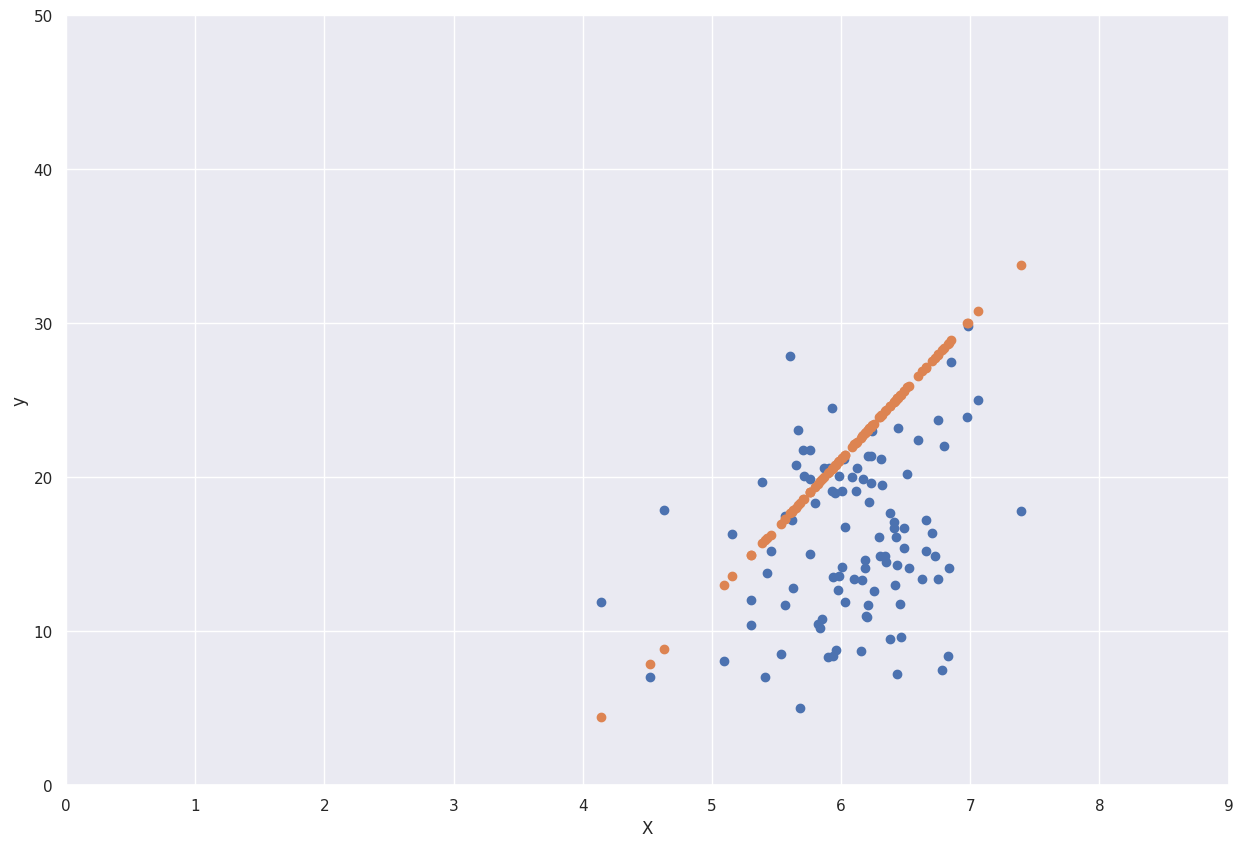

In [53]:
figure(figsize = (15, 10))
plt.xlabel("X")
plt.ylabel("y")
plt.xlim(0, 9)
plt.ylim(0, 50)
plt.scatter(df['rm'][404:], df['medv'][404:])
plt.scatter(df['rm'][404:], predict(df['rm'][404:], w, b))

In [38]:
import imageio
with imageio.get_writer('linear_regression.gif', mode='I') as writer:
    for filename in img_list:
        image = imageio.imread(filename)
        writer.append_data(image)

<ipython-input-38-c80b9243fa1c>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
